In [1]:
from collections import defaultdict
import glob
from itertools import groupby
import operator
import os
import re

import numpy as np
import pandas as pd
import pickle
import random
import sparse
#import tensorly as tl
#import tensorly.decomposition as decomp
import sktensor
import urllib3
#import wget

import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/makrai/tool/python/miniconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
pylab.rcParams['figure.figsize'] = (20, 10)

In [3]:
matplotlib.rcParams.update({'font.size': 14})
from tikzplotlib import save as tikz_save


import logging
logging.basicConfig(level=logging.INFO, 
                    format='%(msecs)d %(levelname)-8s [%(lineno)d] %(message)s')

if not os.path.exists('cp_orth.py'):
    wget.download('http://web.stanford.edu/~vsharan/cp_orth.py')
from cp_orth import orth_als

In [4]:
projdir = '/mnt/permanent/home/makrai/project/verb-tensor/verb/'

def get_df():
    tabular = []
    mx = []
    for filen in glob.glob(os.path.join(projdir, 'tensor/0/ktensor_*.pkl')):
        weight, cutoff, dim = os.path.splitext(os.path.basename(filen))[0].rsplit('_', 2)
        _, weight = weight.split('_', 1)
        cutoff, dim = map(int, (cutoff, dim))
        ktensor, fit, n_iterations, exectimes = pickle.load(open(filen, mode='rb'))
        
        tabular.append((weight, cutoff, dim, ktensor.shape, fit, n_iterations, sum(exectimes)))
    return pd.DataFrame(tabular, columns=['weight', 'cutoff', 'dim', 'shape', 'fit', 'n_iterations', 'time'])

In [5]:
df = get_df()

In [6]:
df[df.cutoff==5].sort_values('fit', ascending=False).head()

,weight,cutoff,dim,shape,fit,n_iterations,time
53,log_freq,5,128,"(83681, 16706, 77883)",0.410871,208,207110.335589
30,iact_sali,5,128,"(83681, 16706, 77883)",0.371610,213,262672.170842
41,log_freq,5,64,"(83681, 16706, 77883)",0.360180,173,85590.580958
11,dice_sali,5,128,"(83681, 16706, 77883)",0.340345,172,173300.644152
47,iact_sali,5,64,"(83681, 16706, 77883)",0.322272,218,106456.973927


In [7]:
consistent_name_d = {'pmi': 'pmi-vanl', 'iact_info': 'iact-vanl', 'log_dice': 'dice-vanl', 
                     'salience': 'pmi-sali', 'iact_sali': 'iact-sali', 'dice_sali': 'dice-sali'}
df.weight = df.weight.apply(consistent_name_d.get)

In [8]:
weights = df[(df.dim==64)&(df.cutoff==5)].sort_values('fit', ascending=False).weight.values

In [9]:
weights

array(['log_freq', 'iact_sali', 'dice_sali', 'iact_vanl', 'dice_vanl',
       'pmi_sali', 'pmi_vanl'], dtype=object)

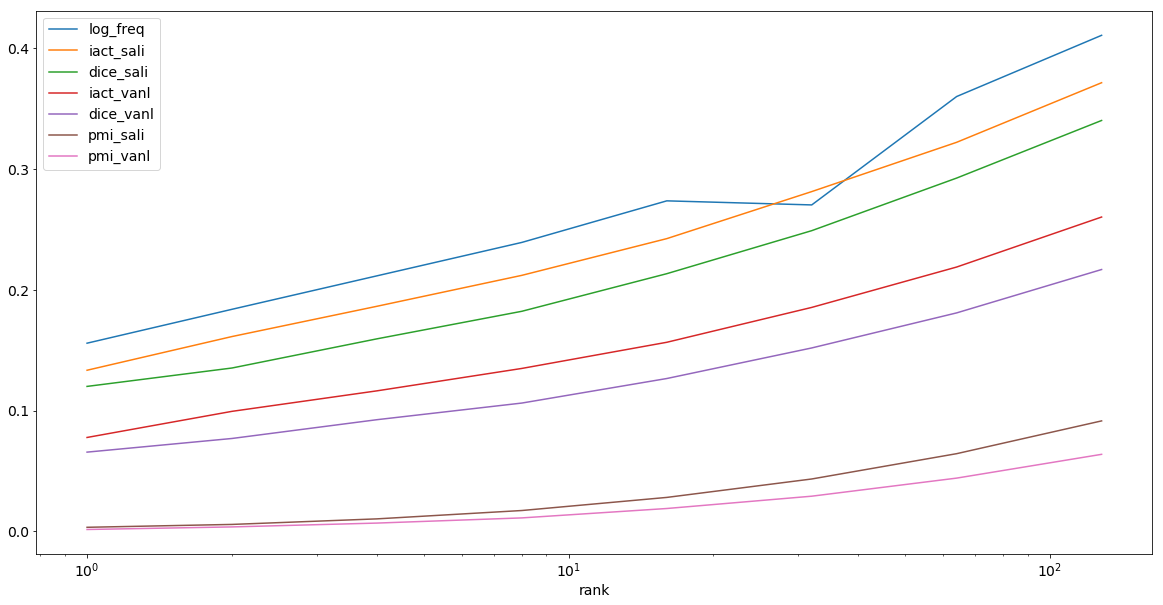

In [10]:
for weight in weights:
    df_w = df[(df.cutoff==5) & (df.weight==weight)].sort_values('dim', ascending=False)
    plt.plot(
        df_w.dim, 
        #df_w.n_iterations)#,
        #df_w.time/60/60)
        df_w.fit)
        
#for i, ser in df[['fit', 'time', 'weight']].iterrows():
#    plt.annotate(ser.weight, (ser.fit, ser.time))
#plt.colorbar()
plt.xlabel('rank')
plt.xscale('log')
_ = plt.legend(weights)
tikz_save(os.path.join(projdir, 'decomp_fit.tikz'), figurewidth = '\\columnwidth')